In [18]:
# import bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import math
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import export_graphviz
import graphviz
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import os
import warnings

# Análise Exploratória dos Dados:

In [19]:
df = pd.read_csv("/Users/lucas/Documents/Lucas /projetos/cars/data/raw.csv")

In [20]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [21]:

df.columns = df.columns.str.lower().str.replace(" ", "_")
df.rename(columns = {'year' : 'car_year', 'make' : 'manufacturer', 'trim' : 'version', 'vin' : 'chassis_number', 'mmr' : 'valuation', 'sellingprice' : 'selling_price', 'saledate' : 'sale_date'}, inplace = True)

In [22]:

df.isnull().sum()

car_year              0
manufacturer      10301
model             10399
version           10651
body              13195
transmission      65352
chassis_number        4
state                 0
condition         11820
odometer             94
color               749
interior            749
seller                0
valuation            38
selling_price        12
sale_date            12
dtype: int64

In [23]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   car_year        558837 non-null  int64  
 1   manufacturer    548536 non-null  object 
 2   model           548438 non-null  object 
 3   version         548186 non-null  object 
 4   body            545642 non-null  object 
 5   transmission    493485 non-null  object 
 6   chassis_number  558833 non-null  object 
 7   state           558837 non-null  object 
 8   condition       547017 non-null  float64
 9   odometer        558743 non-null  float64
 10  color           558088 non-null  object 
 11  interior        558088 non-null  object 
 12  seller          558837 non-null  object 
 13  valuation       558799 non-null  float64
 14  selling_price   558825 non-null  float64
 15  sale_date       558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ 

In [24]:

df.isnull().sum()

car_year              0
manufacturer      10301
model             10399
version           10651
body              13195
transmission      65352
chassis_number        4
state                 0
condition         11820
odometer             94
color               749
interior            749
seller                0
valuation            38
selling_price        12
sale_date            12
dtype: int64

In [25]:

print('Número de duplicados : ', df.duplicated().sum())
df = df.drop_duplicates()

Número de duplicados :  0


In [26]:

df.describe()

,car_year,condition,odometer,valuation,selling_price
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [27]:
# Selecionar apenas as colunas numéricas do DataFrame para verificar multilonicariedade (alto maior que +/- 0.9)
df_numericas = df.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
correlacao = df_numericas.corr()

correlacao

,car_year,condition,odometer,valuation,selling_price
car_year,1.000000,0.340320,-0.772737,0.596631,0.586480
condition,0.340320,1.000000,-0.318188,0.281415,0.321944
odometer,-0.772737,-0.318188,1.000000,-0.588113,-0.582393
valuation,0.596631,0.281415,-0.588113,1.000000,0.983635
selling_price,0.586480,0.321944,-0.582393,0.983635,1.000000


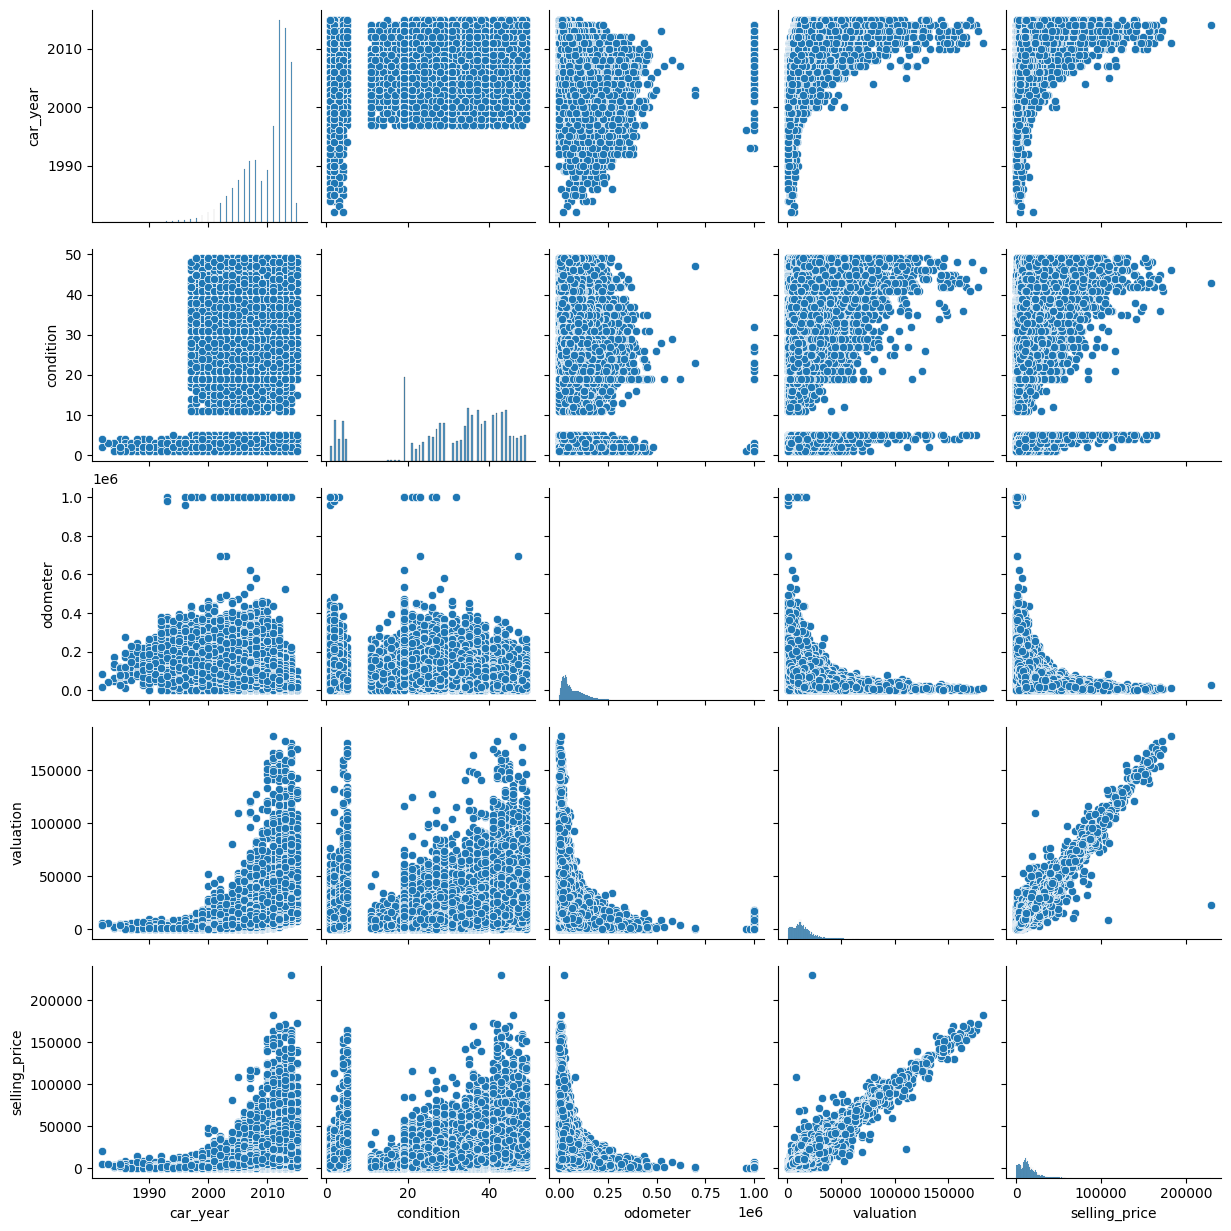

In [28]:
# Criar um pairplot
sns.pairplot(df_numericas)


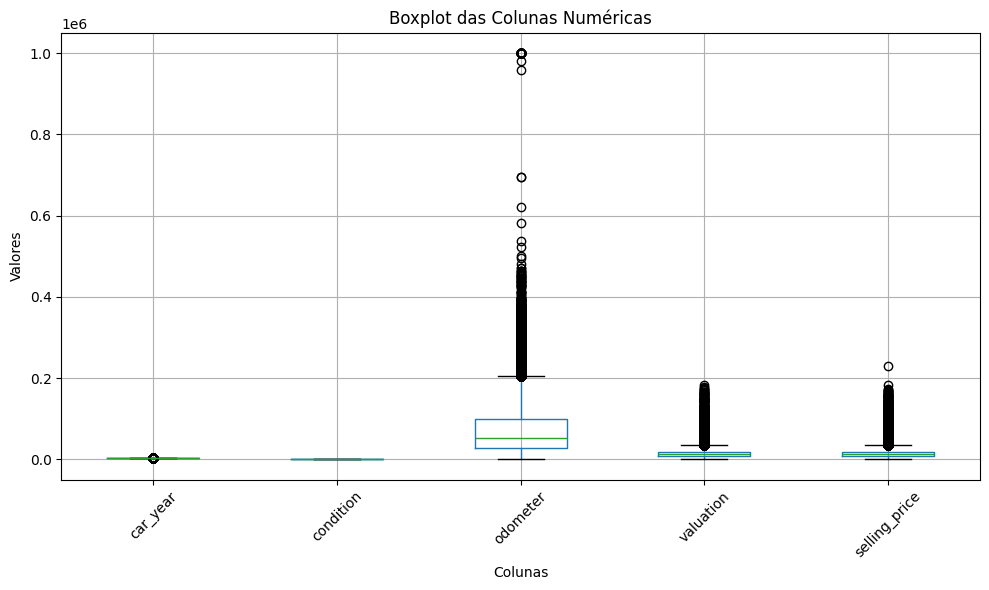

In [29]:
import matplotlib.pyplot as plt

# Vizualização de diagrama de caixa para colunas numéricas
plt.figure(figsize=(10, 6))
df_numericas.boxplot()
plt.title('Boxplot das Colunas Numéricas')
plt.xlabel('Colunas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
#  encontra valores únicos e faz a contagens em cada coluna do df usando a função de contagem de valores.
for i in df.columns:
    print ("--------------- %s ----------------" % i)
    print(df[i].value_counts())

--------------- car_year ----------------
car_year
2012    102315
2013     98168
2014     81070
2011     48548
2008     31502
2007     30845
2006     26913
2010     26485
2005     21394
2009     20594
2004     17342
2003     13281
2002      9715
2015      9437
2001      6468
2000      5227
1999      3363
1998      2149
1997      1546
1996       851
1995       711
1994       392
1993       205
1992       132
1991        67
1990        49
1989        20
1986        11
1988        11
1985        10
1987         8
1984         5
1982         2
1983         1
Name: count, dtype: int64
--------------- manufacturer ----------------
manufacturer
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: count, Length: 96, dtype: int64
--------------- model ----------------
model
Altima        19349
F-150         14479
Fusion     

In [31]:
# Selecionar apenas as colunas do tipo 'object' (categóricas)
df_categoricas = df.select_dtypes(include=['object'])

for col in df_categoricas:
    print(col)
    print(df[col].unique())
    print(df[col].nunique())
    print('\n', "======================================", '\n')


manufacturer
['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai tk' 'mercedes-b' 'vw'
 'Daewoo' 'chev truck' 'ford tk' 'plymouth' 'Plymouth' 'ford truck'
 'Tesla' 'airstream' 'dot' 'Aston Martin' 'Fisker' 'Lamborghini' 'Lotus']
96


model
['Sorento' '3 Series' 'S60' '6 Series 

# Pré-processamento de Dados:

In [32]:
# colocar as variaveis categoricas em lower case:

# Iterar sobre as colunas do DataFrame
for coluna in df.columns:
    # Verificar se o tipo de dado da coluna é string (object)
    if df[coluna].dtype == 'object':
        # Aplicar a conversão para minúsculas em todas as observações da coluna
        df[coluna] = df[coluna].str.lower()


In [33]:
def create_abt(df):
    # Ajustando os tipos de transmissão
    df.drop(df[df['transmission'] == 'sedan'].index, axis='index', inplace=True)
    
    # Ajustando estados que tenham imputação errada para zero (maior que 3 letras)
    df.loc[df['state'].apply(lambda x: len(x) > 3), 'state'] = 'other'
    
    # Substituir valores "—" por "others" na coluna 'interior'
    df['interior'].replace('—', 'other', inplace=True)
    
    # Ordenar o DataFrame por 'model' e 'version' para garantir que as linhas estejam agrupadas corretamente
    df.sort_values(by=['model', 'version'], inplace=True)
    
    # Preencher os valores ausentes na coluna 'transmission' e 'body' usando a propagação para frente (forward fill)
    df['transmission'].fillna(method='ffill', inplace=True)
    df['body'].fillna(method='ffill', inplace=True)
    
    # Excluir linhas com valores faltantes
    df.dropna(axis=0, inplace=True)
    
    # Substituir cores que não são strings por "other"
    df['color'] = df['color'].apply(lambda x: x if isinstance(x, str) else 'other')
    
    # Substituir valores "—" por "other" na coluna 'color'
    df['color'].replace('—', 'other', inplace=True)
    
    # Dicionário para mapear nomes de meses para números
    meses_dict = {
        'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
        'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
        'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
    }
    
    # Extrair partes da data e criar novas colunas
    df['week_day'] = df['sale_date'].str.slice(0, 3)
    df['month'] = df['sale_date'].str.slice(4, 7).map(meses_dict)
    df['day'] = df['sale_date'].str.slice(8, 10).astype(int)
    df['year'] = df['sale_date'].str.slice(11, 15).astype(int)
    
    # Remover a coluna 'sale_date' original se não for mais necessária
    df.drop('sale_date', axis=1, inplace=True)
    
    return df


In [34]:
df = create_abt(df)
df

/var/folders/6x/hyy8ks1j1hd02l9rw3clnpqr0000gn/T/ipykernel_46019/2724052098.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['interior'].replace('—', 'other', inplace=True)
/var/folders/6x/hyy8ks1j1hd02l9rw3clnpqr0000gn/T/ipykernel_46019/2724052098.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

,car_year,manufacturer,model,version,body,transmission,chassis_number,state,condition,odometer,color,interior,seller,valuation,selling_price,week_day,month,day,year
788,2012,bmw,1 series,128i,convertible,automatic,wbaun1c59cvh84475,ca,44.0,28509.0,blue,brown,financial services remarketing (lease),23300.0,22750.0,thu,1,29,2015
806,2012,bmw,1 series,128i,coupe,manual,wbaup9c54cvf46588,ca,29.0,37168.0,blue,gray,financial services remarketing (lease),18100.0,18000.0,thu,12,18,2014
820,2012,bmw,1 series,128i,convertible,automatic,wbaun1c57cvr00222,ca,35.0,24380.0,black,black,financial services remarketing (lease),24100.0,35500.0,thu,12,18,2014
833,2012,bmw,1 series,128i,convertible,automatic,wbaun1c54cvh84268,ca,46.0,15311.0,white,other,financial services remarketing (lease),25000.0,25000.0,thu,12,18,2014
860,2012,bmw,1 series,128i,convertible,automatic,wbaun1c54cvh84416,ca,43.0,33965.0,blue,other,financial services remarketing (lease),23200.0,22750.0,thu,12,18,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541400,2006,lincoln,zephyr,base,sedan,automatic,3lnhm26106r661485,tx,19.0,87349.0,black,tan,santander consumer,5100.0,2200.0,wed,6,17,2015
546772,2006,lincoln,zephyr,base,sedan,automatic,3lnhm26196r640019,ma,37.0,110016.0,black,gray,first ford inc.,4275.0,5200.0,tue,6,16,2015
546775,2006,lincoln,zephyr,base,sedan,automatic,3lnhm26186r639749,oh,32.0,101338.0,black,black,dt credit corporation,4625.0,4300.0,thu,6,18,2015
548943,2006,lincoln,zephyr,base,sedan,automatic,3lnhm26156r638252,fl,39.0,97267.0,green,beige,westfall auto sales,4775.0,7200.0,wed,6,17,2015


In [35]:
# não foi usado par manter a integridade dos dados:

# def remove_outliers_iqr(df, fator=3.0):
#     """
#     Remove outliers de todas as colunas de um DataFrame usando o método do Intervalo Interquartil (IQR).
    
#     Parâmetros:
#         df (DataFrame): DataFrame contendo os dados.
#         fator (float): Fator para multiplicar o IQR na definição dos limites dos outliers. 
#         O padrão é 1.5, foi usado 3.0 para remover apenas os valores mais extremos e não perder tanto a base.
        
#     Retorna:
#         DataFrame: DataFrame com os outliers removidos.
#     """
#     # Cria uma cópia do DataFrame original para evitar modificá-lo
#     df_limpo = df.copy()
    
#     # Inicializa o contador de outliers removidos
#     total_outliers_removidos = 0
    
#     # Itera sobre cada coluna no DataFrame
#     for nome_coluna in df.columns:
#         # Verifica se a coluna contém dados numéricos
#         if df[nome_coluna].dtype in ['int64', 'float64']:
#             # Calcula Q1 (percentil 25) e Q3 (percentil 75)
#             Q1 = df[nome_coluna].quantile(0.25)
#             Q3 = df[nome_coluna].quantile(0.75)

#             # Calcula o intervalo interquartil (IQR)
#             IQR = Q3 - Q1

#             # Define os limites inferior e superior
#             limite_inferior = Q1 - fator * IQR
#             limite_superior = Q3 + fator * IQR

#             # Remove os outliers
#             outliers = df_limpo[~((df_limpo[nome_coluna] >= limite_inferior) & (df_limpo[nome_coluna] <= limite_superior))]
#             total_outliers_removidos += len(outliers)
#             df_limpo = df_limpo[(df_limpo[nome_coluna] >= limite_inferior) & (df_limpo[nome_coluna] <= limite_superior)]
    
#     # Imprime o número total de outliers removidos
#     print("Número total de outliers removidos:", total_outliers_removidos)
    
#     return df_limpo


# # removendo outliers aplicandoa função
# df = remove_outliers_iqr(df)

In [36]:
def normalize_data(df):
    """
    Normaliza os dados em um DataFrame usando a técnica de normalização min-max.
    
    Parâmetros:
        df (DataFrame): DataFrame contendo os dados a serem normalizados.
        
    Retorna:
        DataFrame: DataFrame com os dados normalizados.
    """
    # Cria uma cópia do DataFrame original para evitar modificá-lo
    df_normalized = df.copy()
    
    # Itera sobre cada coluna no DataFrame
    for column_name in df.columns:
        # Verifica se a coluna contém dados numéricos
        if df[column_name].dtype in ['int64', 'float64']:
            # Calcula o valor mínimo e máximo da coluna
            min_value = df[column_name].min()
            max_value = df[column_name].max()
            
            # Normaliza os dados usando a fórmula min-max
            df_normalized[column_name] = (df[column_name] - min_value) / (max_value - min_value)
    
    return df_normalized


In [37]:
df = normalize_data(df)

In [38]:
df

,car_year,manufacturer,model,version,body,transmission,chassis_number,state,condition,odometer,color,interior,seller,valuation,selling_price,week_day,month,day,year
788,0.884615,bmw,1 series,128i,convertible,automatic,wbaun1c59cvh84475,ca,0.895833,0.028508,blue,brown,financial services remarketing (lease),0.127902,0.098909,thu,0.000000,0.933333,1.0
806,0.884615,bmw,1 series,128i,coupe,manual,wbaup9c54cvf46588,ca,0.583333,0.037167,blue,gray,financial services remarketing (lease),0.099327,0.078257,thu,1.000000,0.566667,0.0
820,0.884615,bmw,1 series,128i,convertible,automatic,wbaun1c57cvr00222,ca,0.708333,0.024379,black,black,financial services remarketing (lease),0.132298,0.154344,thu,1.000000,0.566667,0.0
833,0.884615,bmw,1 series,128i,convertible,automatic,wbaun1c54cvh84268,ca,0.937500,0.015310,white,other,financial services remarketing (lease),0.137244,0.108692,thu,1.000000,0.566667,0.0
860,0.884615,bmw,1 series,128i,convertible,automatic,wbaun1c54cvh84416,ca,0.875000,0.033964,blue,other,financial services remarketing (lease),0.127353,0.098909,thu,1.000000,0.566667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541400,0.653846,lincoln,zephyr,base,sedan,automatic,3lnhm26106r661485,tx,0.375000,0.087348,black,tan,santander consumer,0.027888,0.009561,wed,0.454545,0.533333,1.0
546772,0.653846,lincoln,zephyr,base,sedan,automatic,3lnhm26196r640019,ma,0.750000,0.110015,black,gray,first ford inc.,0.023355,0.022604,tue,0.454545,0.500000,1.0
546775,0.653846,lincoln,zephyr,base,sedan,automatic,3lnhm26186r639749,oh,0.645833,0.101337,black,black,dt credit corporation,0.025278,0.018691,thu,0.454545,0.566667,1.0
548943,0.653846,lincoln,zephyr,base,sedan,automatic,3lnhm26156r638252,fl,0.791667,0.097266,green,beige,westfall auto sales,0.026102,0.031300,wed,0.454545,0.533333,1.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535755 entries, 788 to 557763
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   car_year        535755 non-null  float64
 1   manufacturer    535755 non-null  object 
 2   model           535755 non-null  object 
 3   version         535755 non-null  object 
 4   body            535755 non-null  object 
 5   transmission    535755 non-null  object 
 6   chassis_number  535755 non-null  object 
 7   state           535755 non-null  object 
 8   condition       535755 non-null  float64
 9   odometer        535755 non-null  float64
 10  color           535755 non-null  object 
 11  interior        535755 non-null  object 
 12  seller          535755 non-null  object 
 13  valuation       535755 non-null  float64
 14  selling_price   535755 non-null  float64
 15  week_day        535755 non-null  object 
 16  month           535755 non-null  float64
 17  day          

# Seleção do Modelo:

In [40]:
# Copia os dados para evitar modificar o DataFrame original
df_encoded = df.copy()

# Inicializa o codificador de rótulos
label_encoder = LabelEncoder()

# Itera sobre as colunas categóricas e aplique a codificação de rótulos
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])


In [41]:
df_encoded

,car_year,manufacturer,model,version,body,transmission,chassis_number,state,condition,odometer,color,interior,seller,valuation,selling_price,week_day,month,day,year
788,0.884615,5,0,28,5,0,496918,3,0.895833,0.028508,2,3,4400,0.127902,0.098909,4,0.000000,0.933333,1.0
806,0.884615,5,0,28,6,1,497097,3,0.583333,0.037167,2,6,4400,0.099327,0.078257,4,1.000000,0.566667,0.0
820,0.884615,5,0,28,5,0,496907,3,0.708333,0.024379,1,1,4400,0.132298,0.154344,4,1.000000,0.566667,0.0
833,0.884615,5,0,28,5,0,496884,3,0.937500,0.015310,18,10,4400,0.137244,0.108692,4,1.000000,0.566667,0.0
860,0.884615,5,0,28,5,0,496885,3,0.875000,0.033964,2,10,4400,0.127353,0.098909,4,1.000000,0.566667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541400,0.653846,34,823,574,36,0,306668,33,0.375000,0.087348,1,14,10462,0.027888,0.009561,6,0.454545,0.533333,1.0
546772,0.653846,34,823,574,36,0,306746,11,0.750000,0.110015,1,6,4469,0.023355,0.022604,5,0.454545,0.500000,1.0
546775,0.653846,34,823,574,36,0,306740,24,0.645833,0.101337,1,1,3776,0.025278,0.018691,4,0.454545,0.566667,1.0
548943,0.653846,34,823,574,36,0,306712,5,0.791667,0.097266,8,0,12531,0.026102,0.031300,6,0.454545,0.533333,1.0


In [42]:
# dividindo o dataset em features X e target y
X = df_encoded.drop(['valuation', 'selling_price'], axis=1)
y = df_encoded['valuation']

In [43]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
model_rf.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model_rf.predict(X_test)

# Avaliar o modelo usando MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Escolher uma árvore específica do modelo RandomForestRegressor (por exemplo, a primeira árvore)
tree = model_rf.estimators_[0]

# Exportar a árvore para um arquivo .dot
export_graphviz(tree, out_file='tree.dot', feature_names=X.columns, rounded=True, filled=True)

Mean Squared Error (MSE): 4.230796948992244e-05


In [44]:
# from sklearn.tree import export_graphviz
# import graphviz

# # Exportar a árvore para um arquivo .dot
# export_graphviz(tree, out_file='tree.dot', feature_names=X.columns, rounded=True, filled=True)

# # Visualizar a árvore usando Graphviz
# graphviz.Source.from_file('tree.dot')

In [45]:
# Inicialize o modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treine o modelo
model_rf.fit(X_train, y_train)

# Calcule a importância das features
importances = model_rf.feature_importances_

# Crie um DataFrame para visualizar melhor as importâncias
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Ordene o DataFrame por importância das features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Exiba o DataFrame
print(feature_importance_df)


           Feature  Importance
9         odometer    0.338708
6   chassis_number    0.192488
4             body    0.138645
0         car_year    0.120011
2            model    0.090841
1     manufacturer    0.054376
3          version    0.053381
12          seller    0.002730
8        condition    0.001693
14           month    0.001638
15             day    0.001451
7            state    0.001280
11        interior    0.000917
10           color    0.000873
13        week_day    0.000548
5     transmission    0.000241
16            year    0.000178


In [46]:
# Fazer previsões nos dados de teste
y_pred = model_rf.predict(X_test)

# Calcular o MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calcular o RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calcular o MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calcular o R²
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 4.230796948992244e-05
Root Mean Squared Error (RMSE): 0.006504457663012531
Mean Absolute Error (MAE): 0.0028965470392350195
R-squared (R²): 0.9845050059611298


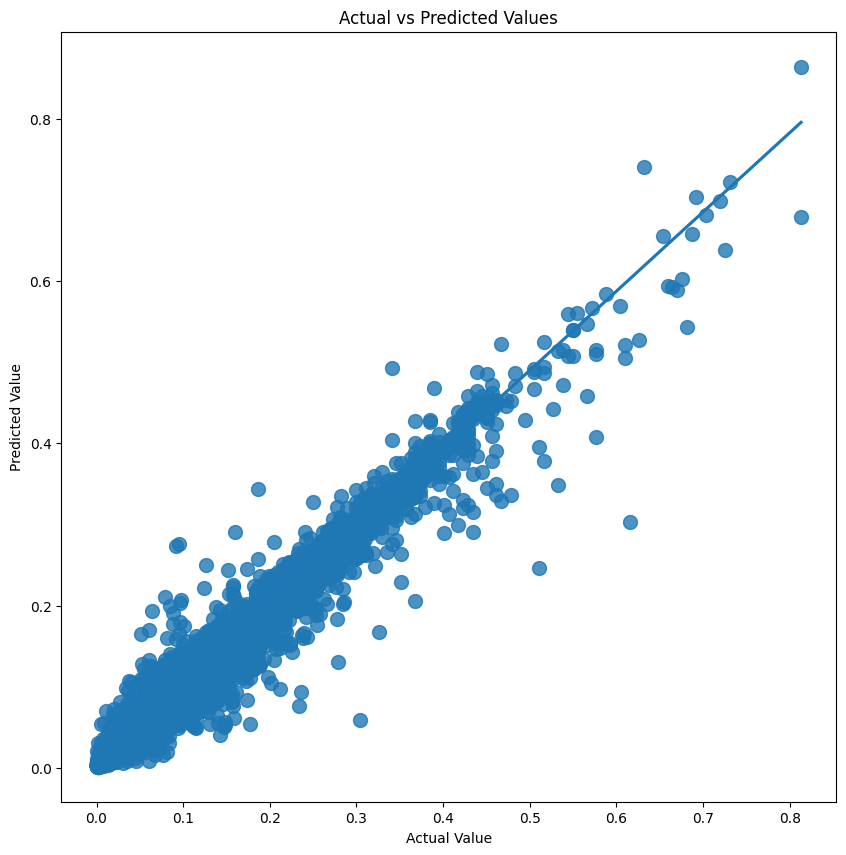

In [47]:
# Plotar valores previstos versus valores reais
plt.figure(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred, fit_reg=True, scatter_kws={"s": 100})
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Values")
plt.show()


In [48]:
# dividindo o dataset em features X e target y ("utilizando o selling_price como target")
X = df_encoded.drop(['valuation', 'selling_price'], axis=1)
y = df_encoded['selling_price']

In [49]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
model_rf.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model_rf.predict(X_test)

# Avaliar o modelo usando MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Escolher uma árvore específica do modelo RandomForestRegressor (por exemplo, a primeira árvore)
tree = model_rf.estimators_[0]

# Exportar a árvore para um arquivo .dot
export_graphviz(tree, out_file='tree.dot', feature_names=X.columns, rounded=True, filled=True)

Mean Squared Error (MSE): 6.421695999464934e-05


In [50]:
# Inicialize o modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Treine o modelo
model_rf.fit(X_train, y_train)

# Calcule a importância das features
importances = model_rf.feature_importances_

# Crie um DataFrame para visualizar melhor as importâncias
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Ordene o DataFrame por importância das features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Exiba o DataFrame
print(feature_importance_df)


           Feature  Importance
9         odometer    0.357032
6   chassis_number    0.187424
4             body    0.134198
0         car_year    0.093135
2            model    0.084275
3          version    0.051669
1     manufacturer    0.051047
8        condition    0.020806
12          seller    0.005316
15             day    0.003419
7            state    0.003220
14           month    0.002302
10           color    0.002149
11        interior    0.002003
13        week_day    0.001404
5     transmission    0.000369
16            year    0.000232


In [51]:
# Fazer previsões nos dados de teste
y_pred = model_rf.predict(X_test)

# Calcular o MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calcular o RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calcular o MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calcular o R²
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 6.421695999464934e-05
Root Mean Squared Error (RMSE): 0.008013548527004085
Mean Absolute Error (MAE): 0.0047537890264266625
R-squared (R²): 0.9629825979249126


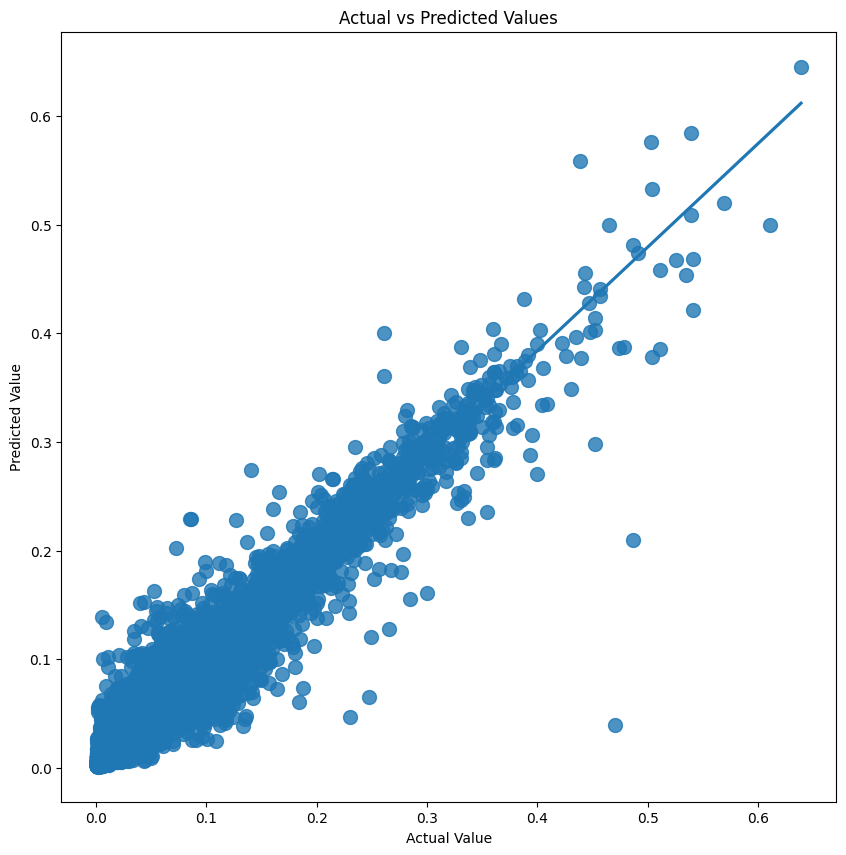

In [52]:
# Plotar valores previstos versus valores reais
plt.figure(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred, fit_reg=True, scatter_kws={"s": 100})
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Values")
plt.show()

# Modelo final

In [58]:
# dividindo o dataset em features X e target y , utillizando as features mais significativas:
X = df_encoded.drop(['valuation', 'selling_price', 'day', 'state', 'month', 'color','interior', 'week_day','transmission','year'], axis=1)
y = df_encoded['valuation']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import export_graphviz
import numpy as np
import pandas as pd

def evaluate_model(X, y):
    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar o modelo de Random Forest
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

    # Treinar o modelo
    model_rf.fit(X_train, y_train)

    # Fazer previsões nos dados de teste
    y_pred = model_rf.predict(X_test)

    # Avaliar o modelo usando MSE, RMSE, MAE e R²
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared (R²):", r2)

    # Exportar a árvore para um arquivo .dot
    tree = model_rf.estimators_[0]
    export_graphviz(tree, out_file='tree.dot', feature_names=X.columns, rounded=True, filled=True)

    # Calcular a importância das features
    importances = model_rf.feature_importances_

    # Criar um DataFrame para visualizar melhor as importâncias
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    })

    # Ordernar o DataFrame por importância das features
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Exibir o DataFrame
    print(feature_importance_df)

    return mse, rmse, mae, r2

# Usar a função para avaliar o modelo
mse, rmse, mae, r2 = evaluate_model(X, y)


Mean Squared Error (MSE): 4.364017528282127e-05
Root Mean Squared Error (RMSE): 0.006606071092776801
Mean Absolute Error (MAE): 0.0033154155863522727
R-squared (R²): 0.984017095029256
          Feature  Importance
7        odometer    0.340379
5  chassis_number    0.194667
4            body    0.138986
0        car_year    0.120279
2           model    0.091065
1    manufacturer    0.054390
3         version    0.054083
8          seller    0.003636
6       condition    0.002514


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Plot learning curve for an estimator.
    
    Parameters:
        estimator: scikit-learn estimator object
            The estimator to train and evaluate.
        X: array-like
            Feature matrix.
        y: array-like
            Target values.
        cv: int or cross-validation generator, optional (default=None)
            Determines the cross-validation splitting strategy.
            Possible inputs for cv are:
              - None, to use the default 5-fold cross-validation
              - int, to specify the number of folds in a KFold
              - An object to be used as a cross-validation generator.
        train_sizes: array-like, optional (default=np.linspace(0.1, 1.0, 10))
            Relative or absolute numbers of training examples to use for training.
            If the dtype is float, it is regarded as a fraction of the maximum size of the training set
            (that is determined by the selected validation method), i.e., it has to be within (0, 1].
            Otherwise, it is interpreted as absolute sizes of the training sets.
            
    Returns:
        None
    """
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation Score")

    plt.legend(loc="best")
    plt.show()


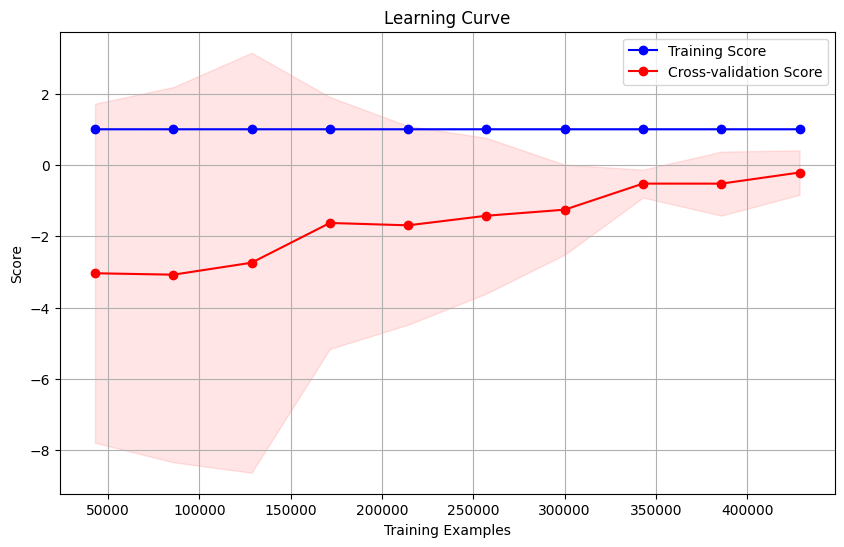

In [64]:
plot_learning_curve(model_rf, X, y)
